In [1]:
!which python; python -V;
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun, Moon
from poliastro.twobody import Orbit
from poliastro.ephem import Ephem

from perylune.orbit_tools import *
from perylune.horizons import *

/home/thomson/devel/perylune/venv/bin/python
Python 3.8.5


In [2]:
# STEP 1: Get ephemerides from the Horizon database. THe closest approach is 2020-04-29,
# so use 10 days before and after it.

txt = get_ephem("1998%20OR2", "2020-04-20", '2020-05-10')
pos = process_ephem(txt)
dates, dist = extract_data(pos)

Local copy exists for 1998%20OR2 (start date; 2020-04-20, end date:2020-05-10 ), using.
Read 12126 bytes from 1998%20OR2-2020-04-20-2020-05-10.txt
Found 21 lines of data


In [3]:
# Let's make a chart of of it
fig = dist_plot(dates, dist, "1998 OR2 asteroid, Earth fly-by 2020")

fig.show()

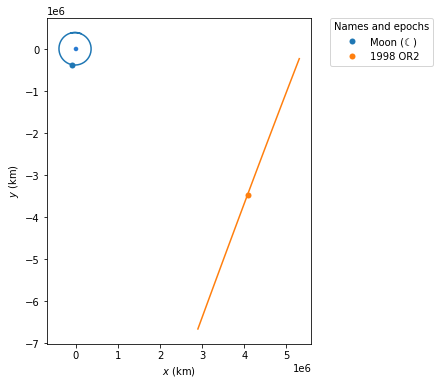

In [4]:

plot = dist_chart("1998 OR2 asteroid", "2020-04-29 0:0:0", 5 * u.day)
plot

In [5]:
# Horizons import example, using Poliastro Ephem.from_horizons
from astropy import time
epoch = time.Time("2020-08-26 10:43")

x = Ephem.from_horizons("Ceres", epochs=epoch)
o = Orbit.from_ephem(Sun, x, epoch)